# RIT DSCI-633: Foundations of Data Science and Analytics
## Assignment 3
### Due: 11:59 pm EST, Saturday, Nov 06, 2021

### Problem 1 (20 points)

**(Use no more than a word, phrase or a sentence to answer these questions)**

1.	Name two ways to deal with class imbalance in the training data.
2.	What is one way of obtaining a continuous-valued score from a Decision Tree classifier ?
3.	What is one way of obtaining a continuous-valued score from a Naïve Bayes classifier ?
4.	Define the skew of a dataset for a two-class problem.
5.	True or False: Precision and Recall share the same numerator in their computation.
6.	Name the two measures used to compute the ROC curve.
7.	True or False: We cannot compute the ROC curve for a classifier that does not return a continuous score.
8.	True or False: TPR and FPR are generally inversely related, one increases as the other decreases.
9.	True or False: Precision and Recall are generally inversely related, one increases as the other decreases.
10.	True or False: A classifier with a higher AUC is the best one to use across all operating points.
11.	A classifier misclassifies every sample in a binary class problem. What is its AUC ?
12.	True or False: If the proportion of true to false instances in a two-class dataset changes, the ROC curve will not change.
13.	True or False: Regression is an example of predictive modeling with supervision.
14.	True or False: Accuracy can be used as a measure to evaluate a regression model
15.	What does the term residual (or residue) refer to in regression ?
16.	True or False: The sum of the residuals is always zero.
17.	State in brief the connection between the Pearson correlation and linear regression.
18.	True or False: If a quadratic regression model generalizes well, a cubic model is likely to generalize better.
19.	What are some steps we can take to reduce overfitting of regression models ?
20.	What is the difference between Multiple Regression and Multivariate Regression ?
21.	What is a more common name for the Coefficient of Determination of a regression line ?



### Solution

1.  - Collect more data <br>
    - Generate Synthetic samples 

2. We can use binary recursive partitioning to make a regression tree from a Decision Tree classifier to obtain a a continuous-valued score


3. A Naïve Bayes classifier calculates the probablities of each class before deciding on the one with the highest probablity.
   <br> You can assign each class a weight and mutiply them by their probablities before summing them together to get a continuous-valued score 
  
  
4. For a two-class problem the skew of the data can be defined as a measure of the imbalance in the number of samples between each class.


5. True both use "True positive" as their numerator


6. TPR and FPR


7. False (ROC curves are generally used for binary classification problems)


8. False (They are roughly linearly related, if all your true predictions are correct all your false predections are also correct)


9. True (generally when percision is high recall is low and vice-versa)


10. False (While AUC is a viable measure to compare classifiers, for a specific given criterion a classifier may outperform others regardless of its AUC)(If all operating points was not mentioned this would be true)


11. If everything is misclassified the AUC is 0 Since TPR and FPR never increase past 0 (Though anyone overseeing this would most likely just flip the output class to give it an AUC of 1)


12. False if the proportion of true to false instances change both the true postive rate and the false postive rate will change altering the ROC curve


13. True


14. False, Accuracy is a measure for classification not regression


15.  A residual is the vertical distance between a data point and the regression line


16. True (this would be the ideal case which is why we choose it for the regression line)


17. both can be used to identify if two numeric variables are significantly linearly related


18. False, while a quadratic might fit the data better, it might not generalize as well due to overfitting


19. We can look at lower degrees for the line of regression to prevent overfitting for our model


20. Multiple regression has only one dependant variable whith multiple predictor variables. Multivariate regression is always with multiple dependant variables.


21. R squared. 




### Problem 2 (20 points)

Download the Indian Liver Patient Dataset from https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset).

Preprocess the data to take care of null values, and replace the categorical attribute with multiple binary attributes using one-hot encoding.

Divide the dataset 70:30 into a training and a test set. 


**2.1.**	Learn a Logistic Regression classifier on the training set. Evaluate the classifier on the test set and compute the following evaluation measures: (i) Accuracy, Error Rate (ii) TPR, FPR, TNR, FNR  (iiI) Sensitivity, Specificity (iv) Precision, Recall, F-measure.

**2.2.**	The LR classifier returns a score (posterior probability) for each sample. Use this score to plot the ROC curve for the test set and compute the Area under the Curve (AUC).

**2.3.**	What evaluation metric matters most for this problem in your opinion, and why ? Pick a desired value of that evaluation metric (e.g. such that FPR < 5%). Determine the optimal threshold on the score that achieves the desired value of your evaluation metric.

**Extra credit (5 points):** Repeat 2.2 above but plot Precision vs Recall (PR curve) instead of ROC curve. When would you prefer to use PR curve instead of ROC curve ?


In [30]:
import pandas as pd
import numpy as np
header_list = ["Age", "Gender", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio", "Selector field"]
df = pd.read_csv('liver.csv', names = header_list)
df['A/G Ratio'].fillna(value=df['A/G Ratio'].mean(), inplace=True)
one_hot = pd.get_dummies(df['Gender'])
df = df.drop('Gender',axis = 1)
df = df.join(one_hot)
df["Selector field"] = df["Selector field"] - 1
train, test = np.split(df.sample(frac=1, random_state=95), [int(.7*len(df))])

### Solution

#### Solution 2.1

Accuracy is :  0.72
Error is :  0.28
Confusion matrix, without normalization
[[111  17]
 [ 32  15]]
Normalized confusion matrix
[[0.8671875  0.1328125 ]
 [0.68085106 0.31914894]]


c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\karan\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


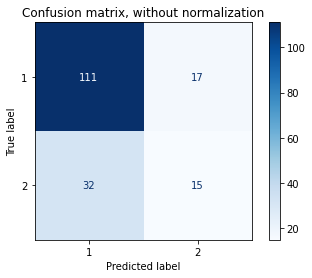

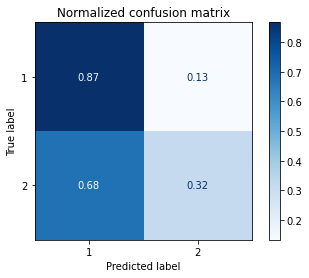

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       128
           1       0.47      0.32      0.38        47

    accuracy                           0.72       175
   macro avg       0.62      0.59      0.60       175
weighted avg       0.69      0.72      0.70       175



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

x_train = train[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
y_train = train[["Selector field"]]

x_test = test[["Age", "Male", "Female", "TB", "DB", "Alkphos", "Sgpt", "Sgot", "TP", "ALB", "A/G Ratio"]]
y_test = test[["Selector field"]]


logisticRegr = LogisticRegression(random_state=0, solver='lbfgs')
logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)

score = logisticRegr.score(x_test, y_test)
print("Accuracy is : ", score)
print("Error is : ", 1-score)

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        logisticRegr,
        x_test,
        y_test,
        display_labels=[1,2],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


print(classification_report(y_test, predictions))

Sensitivty  - recall of postive class - 0.87 <br>
Specificity - recall of negetive class - 0.32 <br>


#### Solution 2.2

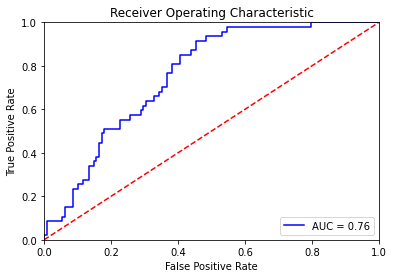

In [39]:
import sklearn.metrics as metrics
probs = logisticRegr.predict_proba(x_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Solution 2.3

In [46]:
# Geometric mean is a good choice as an evaluation metric due to the fact that the factors are not exactly independant of each other (from the correlation graph)
#Using geometric mean as an evaluation metric
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (threshold[ix], gmeans[ix]))

Best Threshold=0.299345, G-Mean=0.711


Logistic: f1=0.380 auc=0.467


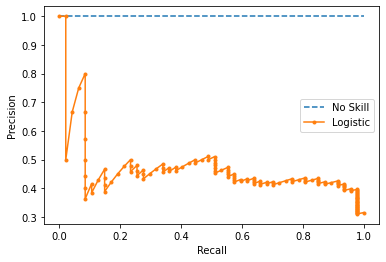

In [49]:
#Extra credit

precision, recall, thresholds = metrics.precision_recall_curve(y_test, preds)
f1 = metrics.f1_score(y_test, predictions)
auc = metrics.auc(recall, precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (f1, auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

Precision-Recall curves should be used when there is a moderate to large class imbalance

### Problem 3 (30 points)

Let’s revisit the diamonds dataset we looked at in Assignment 1 and explore regression analysis to predict the price of diamonds.

Download the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.

**3.1.** Start by plotting the scatter plot of price vs carat, as you had done in Assignment 1.   What can you say about the relationship from the plot ?  (2 points)

**3.2.** Divide the dataset randomly in a 70:30 ratio into a training set and a test set (1 point)

**3.3.** Build a linear regression model on the training data to predict the price of a diamond given its size in carats. (5 points)

* Plot the regression line. (2 points) 
* What is the Coefficient of Determination ? (1 point)
* What is the Standard Error (the mean distance that the observed values fall from the regression line) ? (1 point)
* What is the SSE and MSE ? (1 point)

**3.4.** While carat, a measure of the weight of a diamond is an important predictor of its price, it is possible that other variables that are uncorrelated with carat also have some influence.  Experiment with adding such explanatory variables to the model. What happens to the Coefficient of Determination ? (5 points)

**3.5.** Would a variable transformation on either the response variable (price) or carat, or both, help improve regression over the linear model developed in part 4 ?  (5 points)

**3.6.** For each sample in the test set, predict the price using the best model you have, and compute the standard error of the model on the test set. (5 points)

**3.7.** What could be some problems using this model to estimate the price of unseen diamonds 20 years in the future ? (2 points)

### Solution

#### Solution 3.1

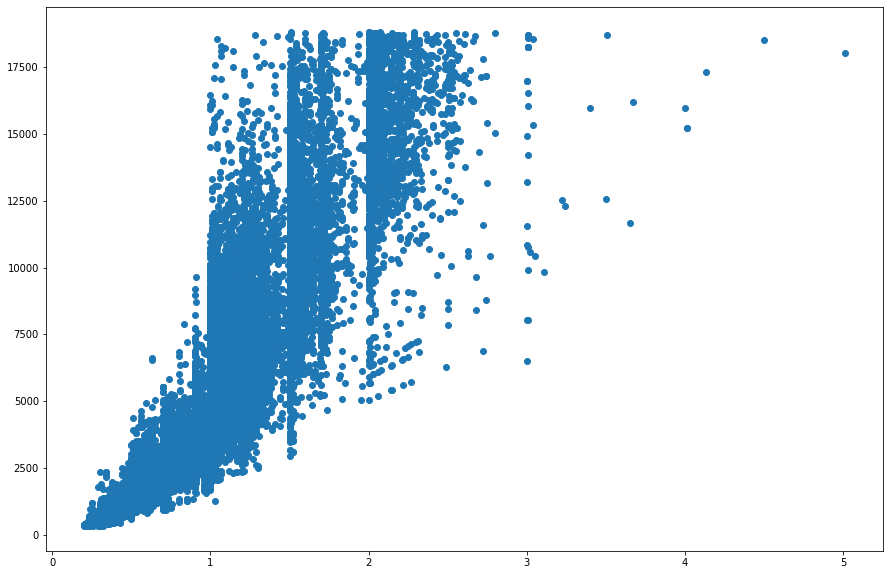

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 10]

diamonds = pd.read_csv('diamonds.csv')

cut_code = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
color_code = {'D':6, 'E':5, 'F':4, 'G':3, 'H':2, 'I':1, 'J':0}
clarity_code = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':6, 'VVS1':7, 'IF':8}

diamonds['cut'] = diamonds['cut'].map(cut_code)
diamonds['color'] = diamonds['color'].map(color_code)
diamonds['clarity'] = diamonds['clarity'].map(clarity_code)


# cut_code = {'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}
# color_code = {'D':6, 'E':5, 'F':4, 'G':3, 'H':2, 'I':1, 'J':0}
# clarity_code = {'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':6, 'VVS1':7, 'IF':8}

# df['cut'] = df['cut'].map(cut_code)
# df['color'] = df['color'].map(color_code)
# df['clarity'] = df['clarity'].map(clarity_code)


diamonds = diamonds.iloc[: , 1:]
plt.scatter(diamonds['carat'], diamonds['price'])
plt.show()

In general it is a roughly linear relationship. As the carat increases the price also increases

#### Solution 3.2

In [10]:
train, test = np.split(diamonds.sample(frac=1, random_state=95), [int(.7*len(diamonds))])

#### Solution 3.3

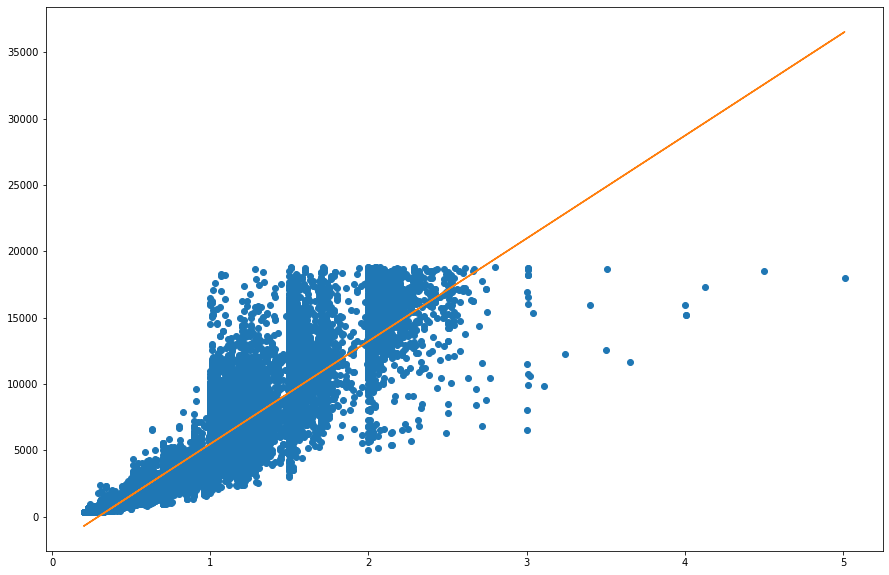

In [15]:
from sklearn.linear_model import LinearRegression

X = train['carat']
Y = train['price']

plt.plot(X, Y, 'o')
m, b = np.polyfit(X, Y, 1)

plt.plot(X, m*X + b)

In [16]:
model = LinearRegression().fit(X.values.reshape(-1, 1), Y.values.reshape(-1, 1))
print("Coefficient of Determination : " , model.score(X.values.reshape(-1, 1), Y.values.reshape(-1, 1)))

Coefficient of Determination :  0.8495500014392536


In [17]:

N = len(X)
p = 2  # one for X plus one because LinearRegression adds an intercept term

X_with_intercept = np.empty(shape=(N, p), dtype=np.float)

X_with_intercept[:, 0] = 1
X_with_intercept[:, 1] = X.values

beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ Y.values
print("Standard Error : ", beta_hat[1])

Standard Error :  7740.054231577898


C:\Users\Karan\AppData\Local\Temp/ipykernel_46076/2394903578.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_with_intercept = np.empty(shape=(N, p), dtype=np.float)


In [27]:
# MSE and SSE
from sklearn.metrics import mean_squared_error

Y_pred = model.predict(X.values.reshape(-1,1))

print("MSE : ", mean_squared_error(Y, Y_pred))


print("SSE : ", ((Y.values - Y_pred)**2).sum())

MSE :  2398885.0961067816
SSE :  4.204373589063605e+16


#### Solution 3.4

In [20]:
## Adding in other measures
from sklearn.metrics import mean_squared_error

X = train[['carat', 'cut', 'color']]
Y = train['price']

model = LinearRegression().fit(X.values, Y.values.reshape(-1, 1))

Y_pred = model.predict(X.values)

print("Coefficient of Determination : " , model.score(X.values, Y.values.reshape(-1, 1)))
print("MSE : ", mean_squared_error(Y, Y_pred))

Coefficient of Determination :  0.8651977120502018
MSE :  2149386.524276357


The Coefficient of Determination slightly increased and MSE has decreased by 10%

#### Solution 3.5

In [21]:
#Looking at log transofrmation for price


from sklearn.metrics import mean_squared_error

X = train[['carat', 'cut', 'color']]
Y = np.log2(train['price'])

model = LinearRegression().fit(X.values, Y.values.reshape(-1, 1))

Y_pred = model.predict(X.values)

print("Coefficient of Determination : " , model.score(X.values, Y.values.reshape(-1, 1)))
print("MSE : ", mean_squared_error(Y, Y_pred))


Coefficient of Determination :  0.8616319208968204
MSE :  0.29660849503633646


Applying a transformation on the response variable significantly reduces the MSE while slightly reducing the Coefficient of Determination

#### Solution 3.6

In [22]:
X = train[['carat', 'cut', 'color']]
Y = np.log2(train['price'])

model = LinearRegression().fit(X.values, Y.values.reshape(-1, 1))

X = test[['carat', 'cut', 'color']]
Y = np.log2(test['price'])

N = len(X)
p = 4  # one for X plus one because LinearRegression adds an intercept term

X_with_intercept = np.empty(shape=(N, p), dtype=np.float)

X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = X.values

beta_hat = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ Y.values
print("Standard Error : ", beta_hat[1])

Standard Error :  2.993036747162652


C:\Users\Karan\AppData\Local\Temp/ipykernel_46076/3143934738.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_with_intercept = np.empty(shape=(N, p), dtype=np.float)


#### Solution 3.7

Such models will not take into account any changes that happen within those 20 years that can have an impact on the diamond pricing. Since the data is not live and the model is not updated on current data it can will get outdated

### Submission instructions

1. Your assignment should be completed by filling in the empty solution cells in this Jupyter notebook file (.ipynb). Feel free to add more cells as needed.

2. Please comment your code using either markdown or #comments and use meaningful variable names to make it as readable and intelligible as possible.

3. Write your code in the form of functions. For example: 

    def my_code ():

          #Write code here
      
          return "The return value"
          

4. If the problem is to find the value of 'x', printing 'x = (your answer)' will help us identify if your code worked.


5. For code that refers to local data files downloaded from the internet, please keep the file path simple (e.g. ~/downloads/datafilename) so that it works on our copy of the dataset. Please do not modify either the filename or the file contents in any way.

6. Solution to problems that do not require any coding can be typed up in their own cells using markdown.
    
7. Unless there are legitimate circumstances, late assignments will not be accepted.

8. All assignments are individual.

9. All the sources used for problem solution must be acknowledged, e.g. web sites, books, research papers, etc.

10. Academic integrity is taken seriously; for detailed information see the RIT Honor Code and with RIT's Academic Integrity Policy.